In [72]:
from colossus.cosmology import cosmology
import numpy as np
from matplotlib import pylab as plt
from classcode.plot_utils import plot_pretty
plot_pretty(dpi=300)
my_cosmo_eds = {'flat': True, 'H0': 73.0, 'Om0': 1, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}

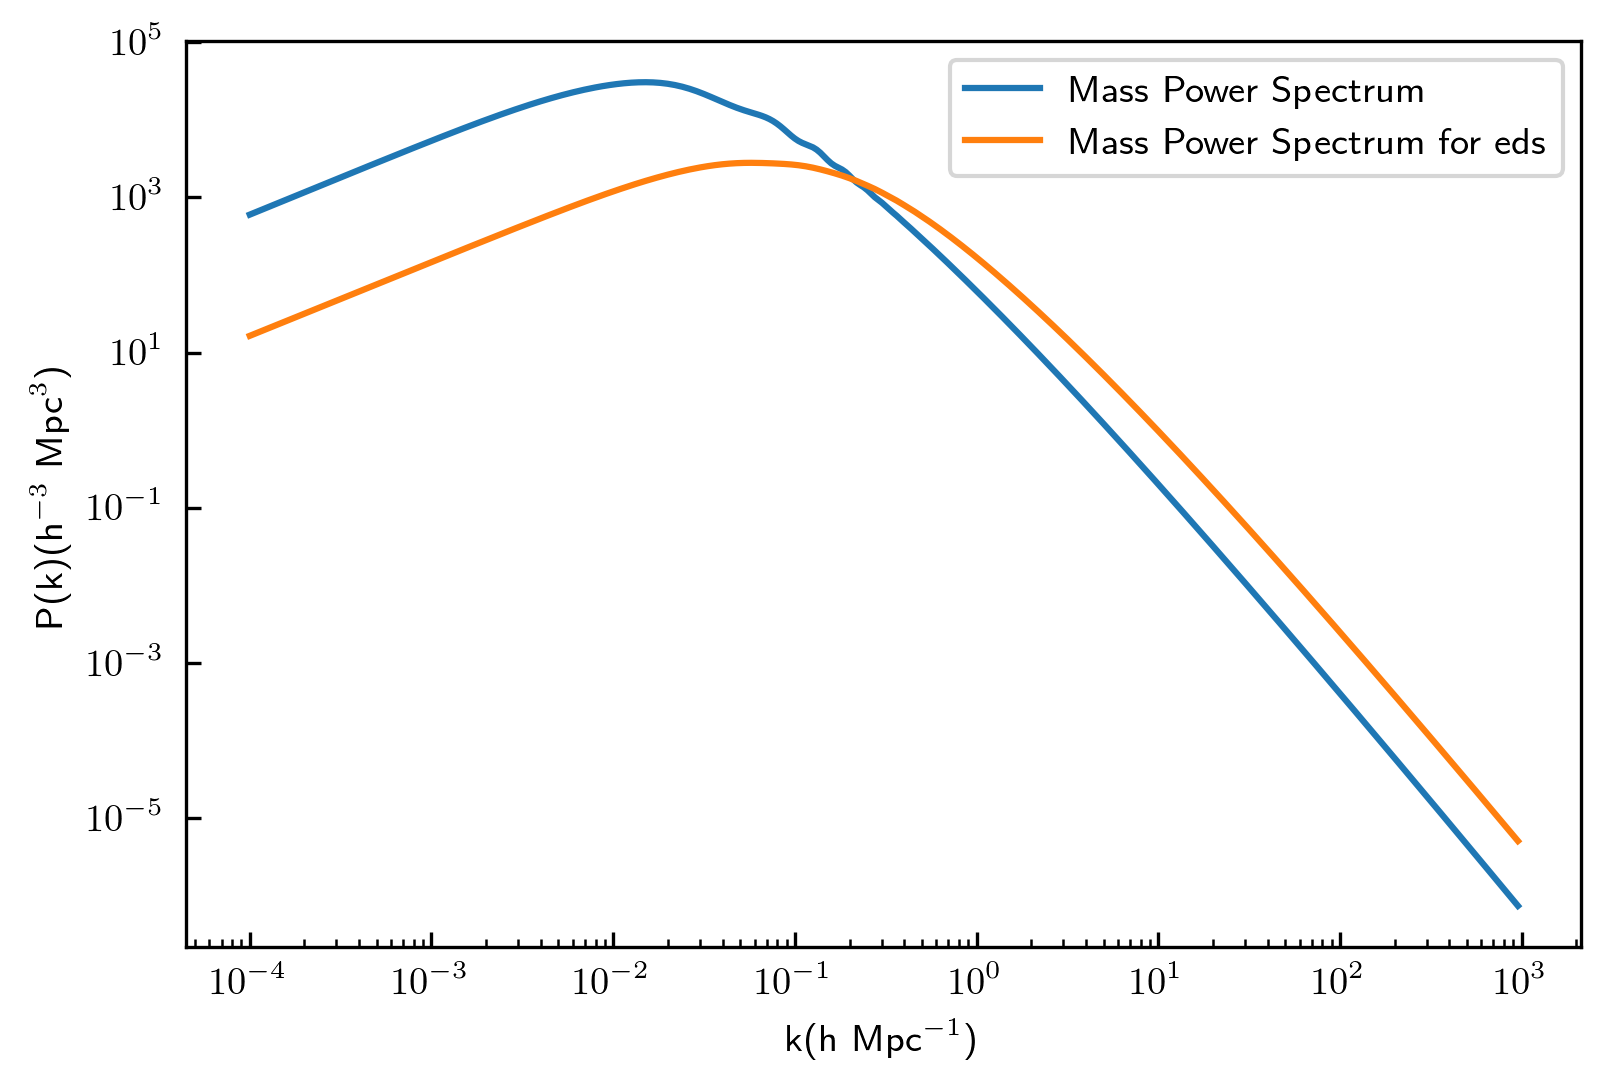

In [73]:
# Plot the matter power spectrum P(k) as a function of k
# Use log on the x-axis

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
my_cosmo2 = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.5, 'ns': 0.96}
my_cosmo3 = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.01, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)
cosmo2 = cosmology.setCosmology('my_cosmo', my_cosmo2)
cosmo3 = cosmology.setCosmology('my_cosmo', my_cosmo3)
cosmo4 = cosmology.setCosmology('eds', my_cosmo_eds)
#cosmo_eds.interpolation = False
cosmo.interpolation = True

# input model spectrum for comparison
lka = np.arange(-4.,3.,0.02)   # k in log
ka = 10.0**lka                 # k in linear
pk = cosmo.matterPowerSpectrum
P = pk(ka, 'eh98', derivative=False)
P2 = cosmo4.matterPowerSpectrum(ka,'eh98', derivative=False)
plt.xscale('log')
plt.yscale('log')
plt.plot(ka, P, label = r'Mass Power Spectrum')
plt.plot(ka, P2, label = r'Mass Power Spectrum for eds')
plt.xlabel('k(h Mpc$^{-1}$)')
plt.ylabel('P(k)(h$^{-3}$ Mpc$^{3}$)')
plt.legend()
plt.show()

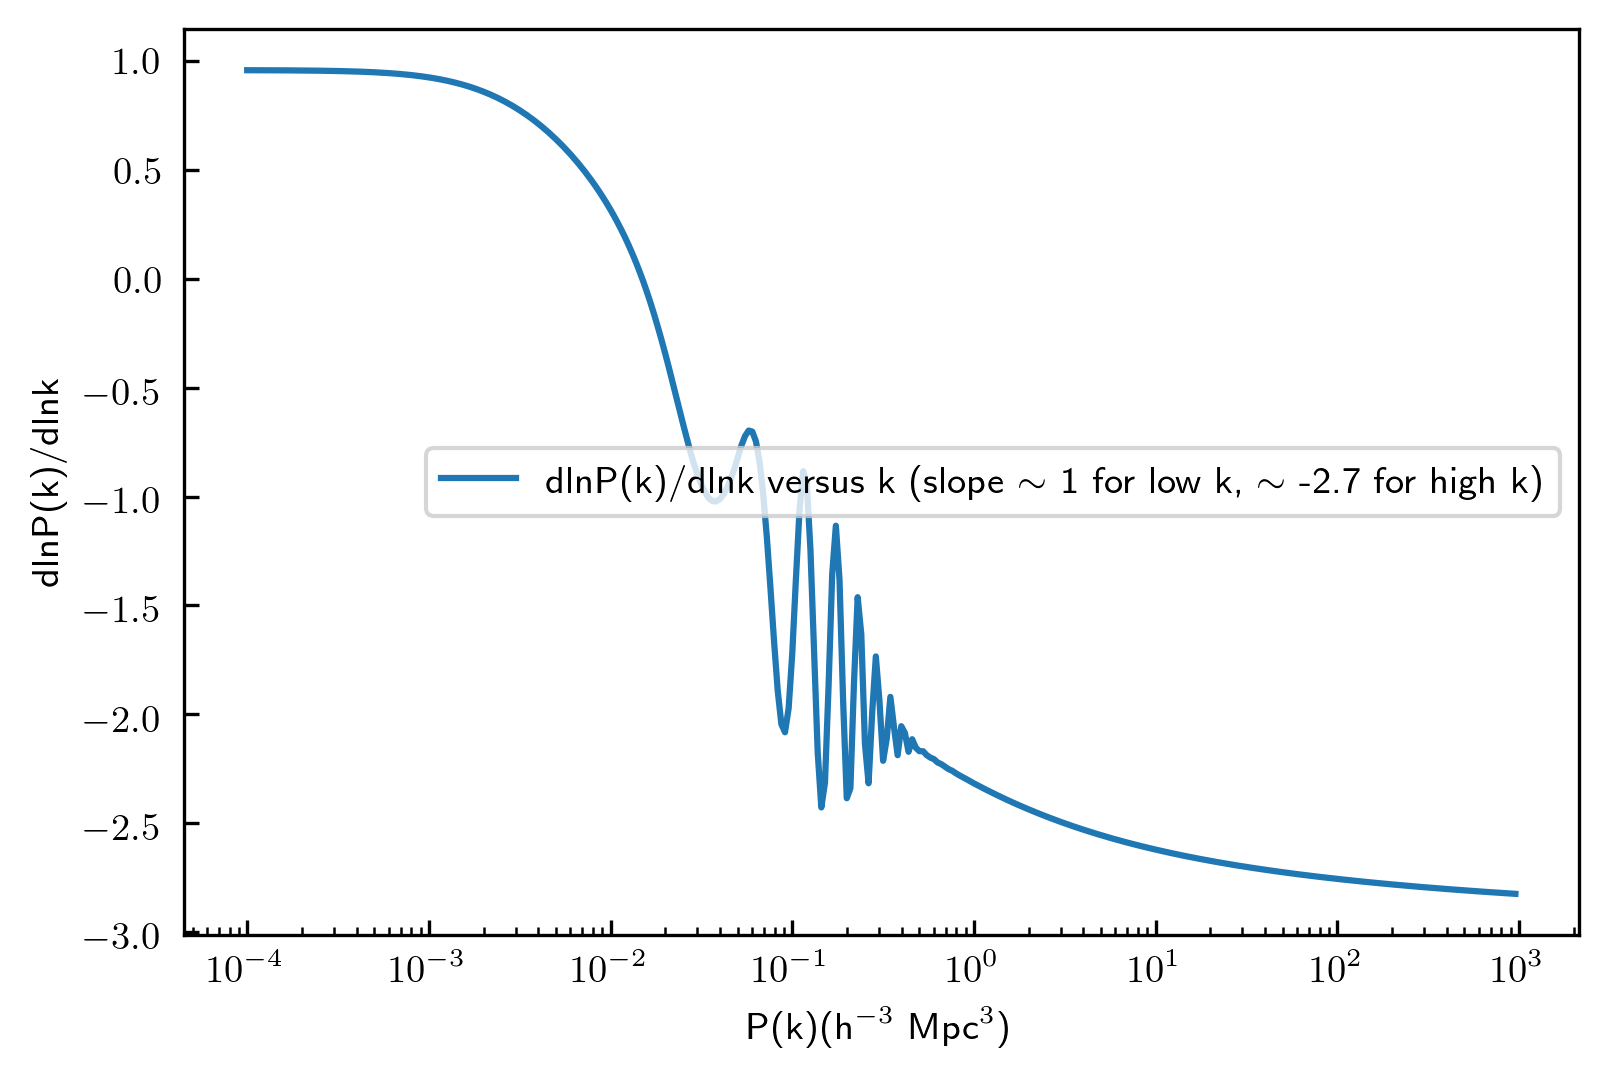

In [58]:
plt.xscale('log')
plt.yscale('linear')
dPk = pk(ka, 'eh98', derivative=True)
plt.plot(ka,dPk, label = "dlnP(k)/dlnk versus k (slope $\sim$ 1 for low k, $\sim$ -2.7 for high k)")
plt.xlabel('P(k)(h$^{-3}$ Mpc$^{3}$)')
plt.ylabel('dlnP(k)/dlnk')
plt.legend()
plt.show()

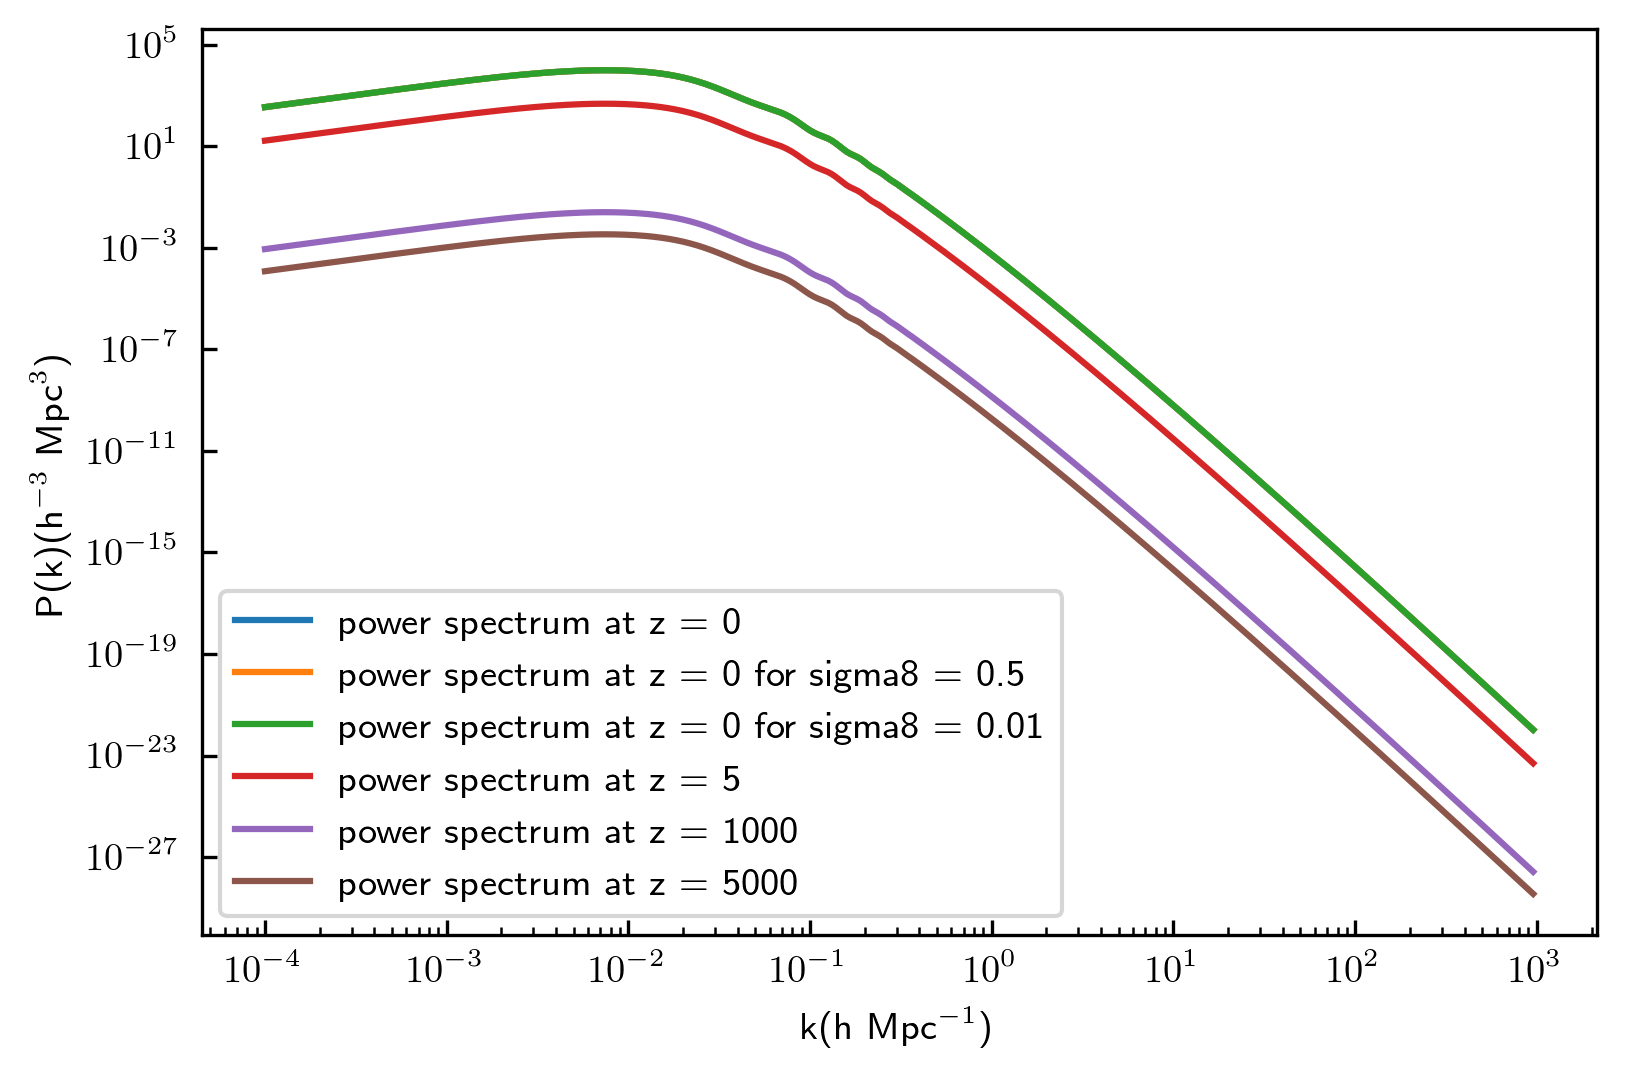

In [59]:
Tk = cosmo.transferFunctionEH98
D = cosmo.growthFactorUnnormalized
Tk2 = cosmo2.transferFunctionEH98
D2 = cosmo2.growthFactorUnnormalized
Tk3 = cosmo3.transferFunctionEH98
D3 = cosmo3.growthFactorUnnormalized
z1 = 0.
z2 = 5.
z3 = 1000.
z4 = 5000.
T = Tk(ka)
T2 = Tk2(ka)
T3 = Tk3(ka)
plt.xscale('log')
plt.yscale('log')
plt.plot(ka, P*T**2*D(z1)**2, label = "power spectrum at z = 0")
plt.plot(ka, P*T2**2*D2(z1)**2, label = "power spectrum at z = 0 for sigma8 = 0.5")
plt.plot(ka, P*T3**2*D3(z1)**2, label = "power spectrum at z = 0 for sigma8 = 0.01")
plt.plot(ka, P*T**2*D(z2)**2, label = "power spectrum at z = 5")
plt.plot(ka, P*T**2*D(z3)**2, label = "power spectrum at z = 1000")
plt.plot(ka, P*T**2*D(z4)**2, label = "power spectrum at z = 5000")
plt.xlabel('k(h Mpc$^{-1}$)')
plt.ylabel('P(k)(h$^{-3}$ Mpc$^{3}$)')
plt.legend()
plt.show()